# Using signals to obtain MFCC Features

In [71]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

* signal – the audio signal from which to compute features. Should be an N*1 array
* samplerate – the samplerate of the signal we are working with.
* winlen – the length of the analysis window in seconds. Default is 0.025s (25 milliseconds)
* winstep – the step between successive windows in seconds. Default is 0.01s (10 milliseconds)
* numcep – the number of cepstrum to return, default 13
* nfilt – the number of filters in the filterbank, default 26.
* nfft – the FFT size. Default is 512.
* lowfreq – lowest band edge of mel filters. In Hz, default is 0.
* highfreq – highest band edge of mel filters. In Hz, default is samplerate/2
* preemph – apply preemphasis filter with preemph as coefficient. 0 is no filter. Default is 0.97.
* ceplifter – apply a lifter to final cepstral coefficients. 0 is no lifter. Default is 22.
* appendEnergy – if this is true, the zeroth cepstral coefficient is replaced with the log of the total frame energy.
* winfunc – the analysis window to apply to each frame. By default no window is applied. You can use numpy window functions here e.g. winfunc=numpy.hamming

HotBoy -  1
Sunflower -1
ILikeIt - 1
Rockstar - 1
Starboy - 1


MLKDream - 0
jungle - 0 
GetMine - 0
AtTheClub - 0
FineChina - 0


In [ ]:
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav

In [73]:
(rate,sig) = wav.read("HotBoy.wav")
mfcc_feat = mfcc(sig,rate)
#d_mfcc_feat = delta(mfcc_feat, 2)
#fbank_feat = logfbank(sig,rate)
#hot_boy = pd.DataFrame(np.mean(fbank_feat, axis=0)).transpose()
one = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
one['is_hit'] = 1

(rate,sig) = wav.read("Sunflower.wav")
mfcc_feat = mfcc(sig,rate)
two = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
two['is_hit'] = 1

(rate,sig) = wav.read("ILikeIt.wav")
mfcc_feat = mfcc(sig,rate)
three = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
three['is_hit'] = 1

(rate,sig) = wav.read("Rockstar.wav")
mfcc_feat = mfcc(sig,rate)
four = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
four['is_hit'] = 1

(rate,sig) = wav.read("Starboy.wav")
mfcc_feat = mfcc(sig,rate)
five = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
five['is_hit'] = 1

In [72]:
(rate,sig) = wav.read("MLKDream.wav")
mfcc_feat = mfcc(sig,rate)
six = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
six['is_hit'] = 0

(rate,sig) = wav.read("jungle.wav")
mfcc_feat = mfcc(sig,rate)
seven = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
seven['is_hit'] = 0

(rate,sig) = wav.read("GetMine.wav")
mfcc_feat = mfcc(sig,rate)
eight = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
eight['is_hit'] = 0

(rate,sig) = wav.read("AtTheClub.wav")
mfcc_feat = mfcc(sig,rate)
nine = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
nine['is_hit'] = 0

(rate,sig) = wav.read("FineChina.wav")
mfcc_feat = mfcc(sig,rate)
ten = pd.DataFrame(np.mean(mfcc_feat,axis=0)).transpose()
ten['is_hit'] = 0


In [74]:
final = one.append(two, ignore_index=True)
final = final.append(three, ignore_index=True)
final = final.append(four, ignore_index=True)
final = final.append(five, ignore_index=True)
final = final.append(six, ignore_index=True)
final = final.append(seven, ignore_index=True)
final = final.append(eight, ignore_index=True)
final = final.append(nine, ignore_index=True)
final = final.append(ten, ignore_index=True)

In [75]:
final

,0,1,2,3,4,5,6,7,8,9,10,11,12,is_hit
0,18.492276,10.332741,-14.095161,-14.755182,22.812128,-41.080560,24.291515,-19.384292,-1.988264,6.711872,-7.014448,1.888141,-0.489726,1
1,18.829886,15.227135,-6.163772,-12.996859,25.377363,-36.513184,22.272397,-20.239632,-8.689257,-6.772696,-0.119384,-2.187521,-0.281808,1
2,19.544789,11.458744,-13.363123,-20.034201,24.453032,-41.312218,26.694799,-18.305884,-2.328175,0.656279,-6.955135,1.901923,2.360378,1
3,17.001445,13.360960,-0.446789,-10.022686,22.314148,-38.592228,28.435354,-14.097012,-2.668326,1.125349,-4.401842,1.890709,4.143143,1
4,18.549076,10.037066,-6.512212,-9.687447,24.681812,-38.444779,35.410108,-13.901642,-5.405690,4.824123,-9.279814,8.575719,3.932357,1
5,18.402016,-10.113751,-27.759714,-6.937497,-13.098134,-14.731433,-17.463871,-12.132240,-3.576254,9.235140,-0.823902,-3.826428,0.354375,0
6,18.216616,15.845690,-6.539315,-23.923180,21.731667,-33.086275,21.673082,-17.379352,1.620039,-13.132196,-2.064081,-5.914801,7.185053,0
7,17.919292,14.070864,-5.339703,-8.413132,25.815008,-39.231571,22.545458,-13.970593,0.586498,0.196203,-10.791452,-2.912859,1.912392,0
8,18.381435,5.711339,-13.959252,-5.981980,34.466062,-38.915265,29.718576,-13.599698,-3.295196,7.451530,-17.327299,5.215666,-3.423490,0
9,18.119846,9.424380,-12.042908,-10.491722,17.994705,-48.067717,25.318080,-13.294245,-4.034145,3.637104,-16.724443,9.061200,1.250258,0


In [76]:
final.describe()
# higher variance -> better at explaining?

,0,1,2,3,4,5,6,7,8,9,10,11,12,is_hit
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,18.345668,9.535517,-10.622195,-12.324389,20.654779,-36.997523,21.889550,-15.630459,-2.977877,1.393271,-7.550180,1.369175,1.694293,0.500000
std,0.649450,7.547866,7.537360,5.778185,12.584066,8.707944,14.440979,2.895727,2.895043,6.855740,6.095231,5.139808,2.953428,0.527046
min,17.001445,-10.113751,-27.759714,-23.923180,-13.098134,-48.067717,-17.463871,-20.239632,-8.689257,-13.132196,-17.327299,-5.914801,-3.423490,0.000000
25%,18.144038,9.577551,-13.810220,-14.315601,21.877287,-40.618313,22.340662,-18.074251,-3.919673,0.311222,-10.413542,-2.731524,-0.122762,0.000000
50%,18.391725,10.895742,-9.291112,-10.257204,23.632580,-38.753746,24.804797,-14.033802,-2.981761,2.381227,-6.984791,1.889425,1.581325,0.500000
75%,18.534876,13.893388,-6.250882,-8.731710,25.203475,-36.996083,28.000215,-13.675184,-2.073242,6.239934,-2.648521,4.387230,3.539362,1.000000
max,19.544789,15.845690,-0.446789,-5.981980,34.466062,-14.731433,35.410108,-12.132240,1.620039,9.235140,-0.119384,9.061200,7.185053,1.000000


In [108]:
# Splitting the test data into the predictor and response variables 
X = final.iloc[:, :-1].values  
y = final.iloc[:, -1].values  

# Predicting y values from test data using the model and coefficents found in part A
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

# random forest model creation
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

In [109]:
accuracy = accuracy_score(y_test, y_predict)
print("The accuracy rate is:", accuracy)

The accuracy rate is: 0.75


In [110]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
base_roc_auc = auc(false_positive_rate, true_positive_rate)
base_roc_auc

0.75

# Feature Importance

In [82]:
importances = list(rfc.feature_importances_)
feature_list = list(final.drop('is_hit', axis=1).columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
items = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable:                    3 Importance: 0.2
Variable:                    9 Importance: 0.16
Variable:                   10 Importance: 0.14
Variable:                   11 Importance: 0.12
Variable:                    1 Importance: 0.08
Variable:                    2 Importance: 0.06
Variable:                    0 Importance: 0.04
Variable:                    5 Importance: 0.04
Variable:                    7 Importance: 0.04
Variable:                   12 Importance: 0.04
Variable:                    4 Importance: 0.0
Variable:                    6 Importance: 0.0
Variable:                    8 Importance: 0.0


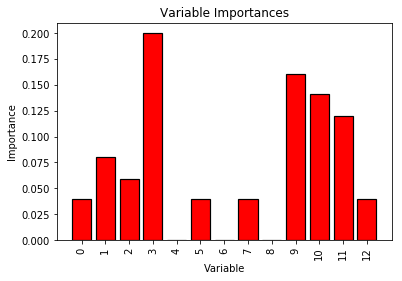

In [83]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

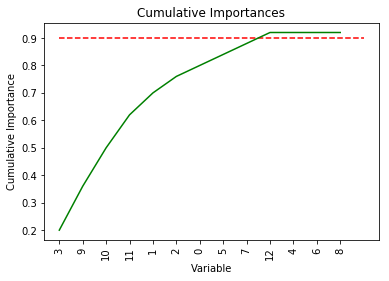

In [84]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [107]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:10]]

X = pd.DataFrame(X)

# Create training and testing sets with only the important features
important_X = X[important_feature_names] # this removes unimportant features
y = y # y remains the same

# implementing train-test-split on important features
X_train, X_test, y_train, y_test = train_test_split(important_X, y, test_size=0.40, random_state=1)

# random forest model creation
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

# AUC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
base_roc_auc = auc(false_positive_rate, true_positive_rate)
base_roc_auc

0.75

# Hyper Parameter Tuning

In [100]:
from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint
import matplotlib.pyplot as plt


# Number of trees in random forest
n_estimators= [10,20,25,30]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [5,10,15,20]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 25, 30]}


In [101]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation: i.e. "20 percent is used for testing"
# search across 25 different combinations, and use all available cores

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                                n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   12.2s finished
C:\Users\Jonathan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [102]:
rfc_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': True}

In [106]:
# implementing train-test-split on important features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

# random forest model creation
rfc = RandomForestClassifier(n_estimators=30,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',
                             max_depth = 5, bootstrap = True)
rfc.fit(X_train,y_train)

# predictions
y_predict = rfc.predict(X_test)

# AUC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
final_roc_auc= auc(false_positive_rate, true_positive_rate)
final_roc_auc

0.75